Step I **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

Step II **Loading Dataset**

In [2]:
df = pd.read_csv('loan_data.csv')

Step III **Analzing how the data is distributed**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Step IV **Analzing how the data is distributed**

Now, i will use matplotlib to plot graphs, so that I can find a degree of correlation between the variables

<Axes: xlabel='fico', ylabel='Count'>

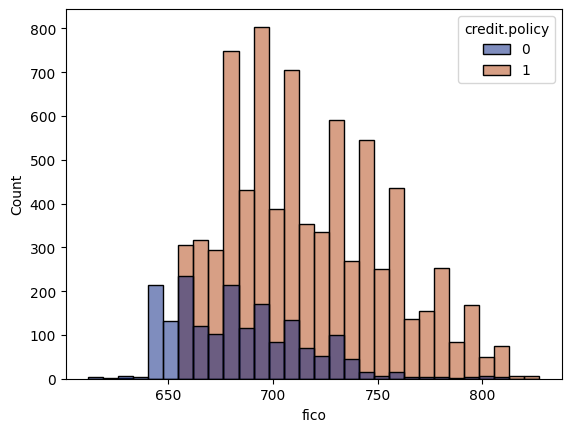

In [32]:
#I will create a histogram using two FICO distributiions (Credit Policy = 1 ; Credit Policy = 0)
sns.histplot(data=df, x="fico", hue="credit.policy", bins=30, palette='dark')

<Axes: xlabel='fico', ylabel='Count'>

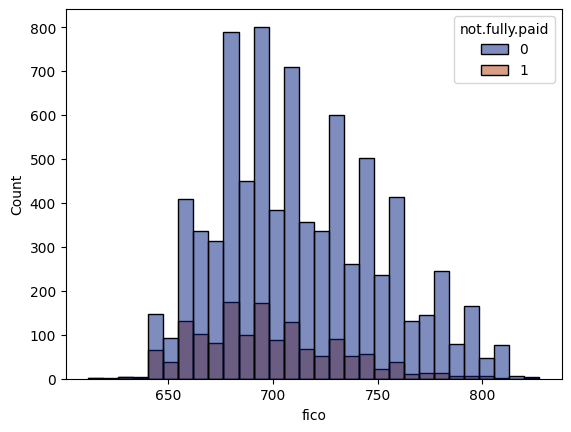

In [31]:
#Replacing the variable Credit Policy with Not Fully Paid 
sns.histplot(data=df, x="fico", hue="not.fully.paid", bins=30, palette='dark')

<Axes: xlabel='purpose', ylabel='count'>

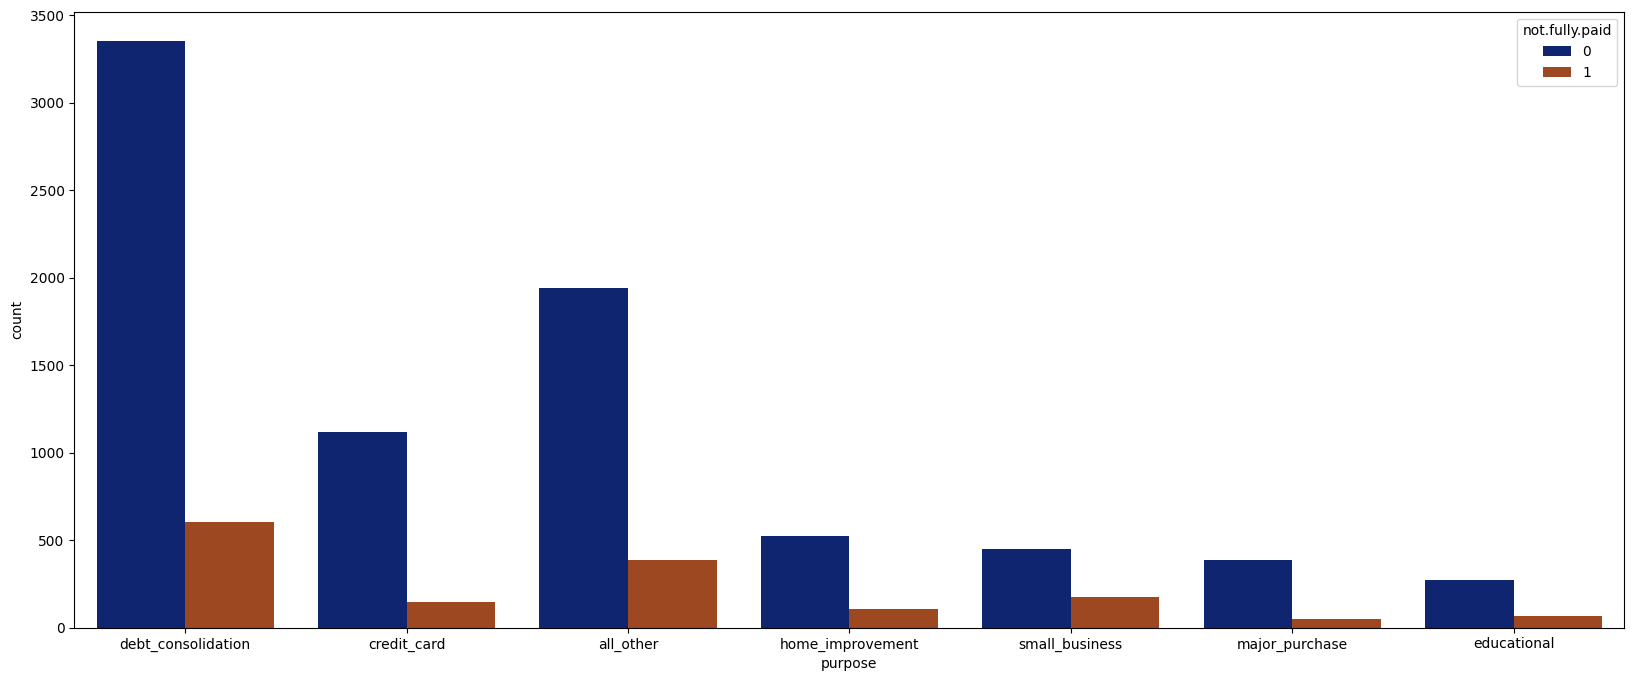

In [23]:
#Countplot using the loans count by purpose and not fully paid situation
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(data=df, x='purpose', hue='not.fully.paid', palette='dark')

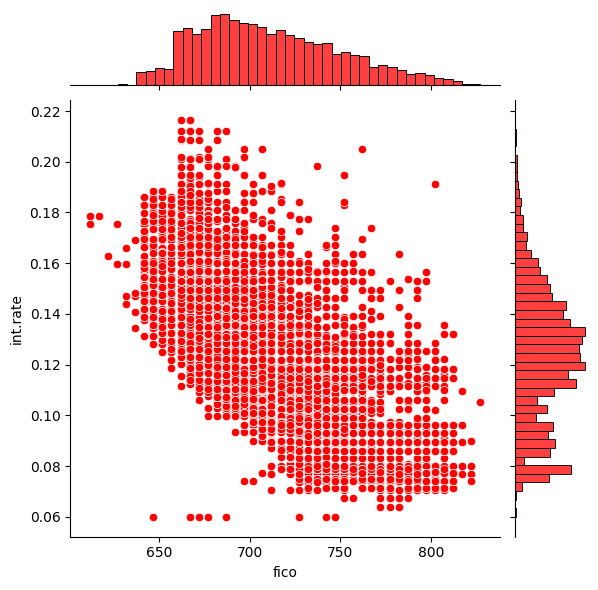

In [28]:
#Tendence between Int.Rate and FICO
sns.jointplot(data=df, x='fico', y='int.rate', color='red')

d:\Python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


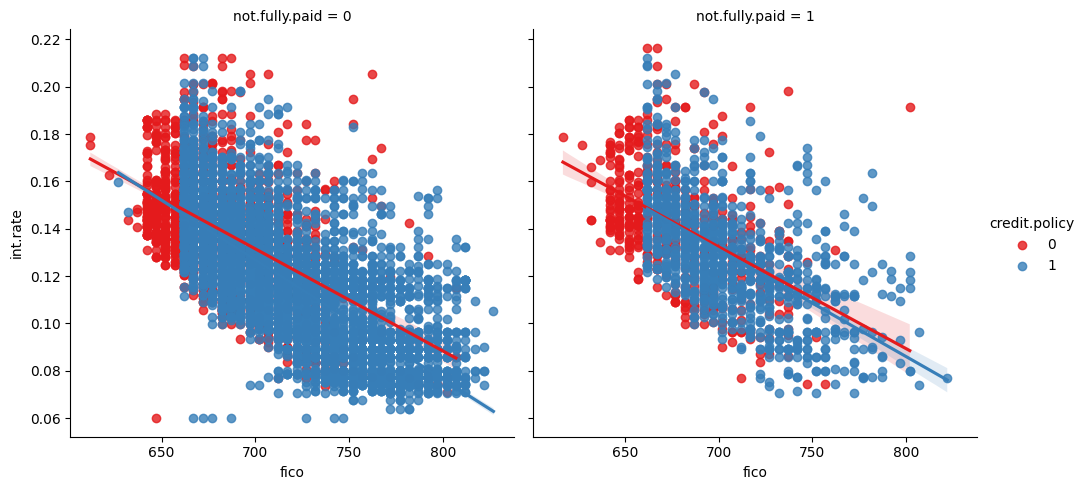

In [36]:
#Checking tendence Int Rate x Fico (Not Fully Paid and Credit Policy)
sns.lmplot(
    data=df, x="fico", y="int.rate",
    hue="credit.policy", col="not.fully.paid", palette='Set1')

**Models Implementation**

First of all, the column "Purpoose" in the Dataset is not in a proper format to implement the Classification Models.

So, i will convert this class variable to the binary form, creating new columns using get_dummies (1 = True ; 0 = False)

In [11]:
df_final = pd.get_dummies(df, columns = ['purpose'], drop_first=True)

In [12]:
df_final

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0



Spliting the Dataset between Training Dataset (70%) and Test Dataset (30%)

In [13]:
Y = df_final['not.fully.paid']
X = df_final.drop('not.fully.paid',axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

Fist, i will use the Decision Tree Classifier, then i will implement Random Forest

**Decison Tree Classifier**

In [33]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [15]:
dtree_preds = dtree.predict(x_test)
print(confusion_matrix(y_test, dtree_preds))
print(classification_report(y_test, dtree_preds))

[[1984  447]
 [ 341  102]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



Step VI **Random Forest**

In [34]:
rnf_clf = RandomForestClassifier()
rnf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [17]:
rnf_preds = rnf_clf.predict(x_test)
print(confusion_matrix(y_test, rnf_preds))
print(classification_report(y_test, rnf_preds))

[[2417   14]
 [ 434    9]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.39      0.02      0.04       443

    accuracy                           0.84      2874
   macro avg       0.62      0.51      0.48      2874
weighted avg       0.78      0.84      0.78      2874

